<a href="https://colab.research.google.com/github/bhargav-borah/House-Price-Prediction-Model/blob/main/decision_tree_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Regression

## Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the cleaned data set

In [28]:
dataset = pd.read_csv('housing_clean_formatted.csv')

In [29]:
dataset = dataset.drop(columns=['Unnamed: 0'])

## Extracting the Features and the Dependent Variable from the DataFrame

In [30]:
dataset

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,median_house_value
0,-122.23,37.88,41,880,129,322,126,8.3252,0,0,1,0,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,0,0,1,0,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,0,0,1,0,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,0,0,1,0,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,0,0,1,0,342200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,0,1,0,0,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,0,1,0,0,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,0,1,0,0,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,0,1,0,0,84700


In [31]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the data set into the Training set and the Test set

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Training the Model

In [33]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Pedicting the Results

### Training set

In [34]:
y_pred_train = regressor.predict(X_train)
performance_train = pd.DataFrame({'ACTUAL VALUES': y_train, 'PREDICTIONS': y_pred_train})
performance_train

,ACTUAL VALUES,PREDICTIONS
0,381300,381300.0
1,329300,329300.0
2,185400,185400.0
3,500001,500001.0
4,97500,97500.0
...,...,...
15475,144600,144600.0
15476,159400,159400.0
15477,289300,289300.0
15478,484600,484600.0


### Test set

In [35]:
y_pred_test = regressor.predict(X_test)
performance_test = pd.DataFrame({'ACTUAL VALUES': y_test, 'PREDICTIONS': y_pred_test})
performance_test

,ACTUAL VALUES,PREDICTIONS
0,136900,136900.0
1,241300,241300.0
2,200700,200700.0
3,72500,72500.0
4,460000,460000.0
...,...,...
5155,121200,121200.0
5156,137500,137500.0
5157,160900,160900.0
5158,227300,227300.0


## Model Evaluation

In [36]:
from sklearn.metrics import r2_score

### Training set

In [37]:
r_squared_train = r2_score(y_train, y_pred_train)
print('R-squared = ', r_squared_train)

R-squared =  1.0


In [38]:
print('Adjusted R-squared = ', 1 - (1-r_squared_train)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  1.0


### Test set

In [39]:
r_squared_test = r2_score(y_test, y_pred_test)
print('R-squared = ', r2_score(y_test, y_pred_test))

R-squared =  1.0


In [40]:
print('Adjusted R-squared = ', 1 - (1-r_squared_test)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

Adjusted R-squared =  1.0


## Visualising the Predictions

### Training set

In [41]:
performance_train['ERROR'] = performance_train['ACTUAL VALUES'] - performance_train['PREDICTIONS']
performance_train.reset_index(drop=True, inplace=True)
performance_train.reset_index(inplace=True)
performance_train

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,381300,381300.0,0.0
1,1,329300,329300.0,0.0
2,2,185400,185400.0,0.0
3,3,500001,500001.0,0.0
4,4,97500,97500.0,0.0
...,...,...,...,...
15475,15475,144600,144600.0,0.0
15476,15476,159400,159400.0,0.0
15477,15477,289300,289300.0,0.0
15478,15478,484600,484600.0,0.0


<BarContainer object of 15480 artists>

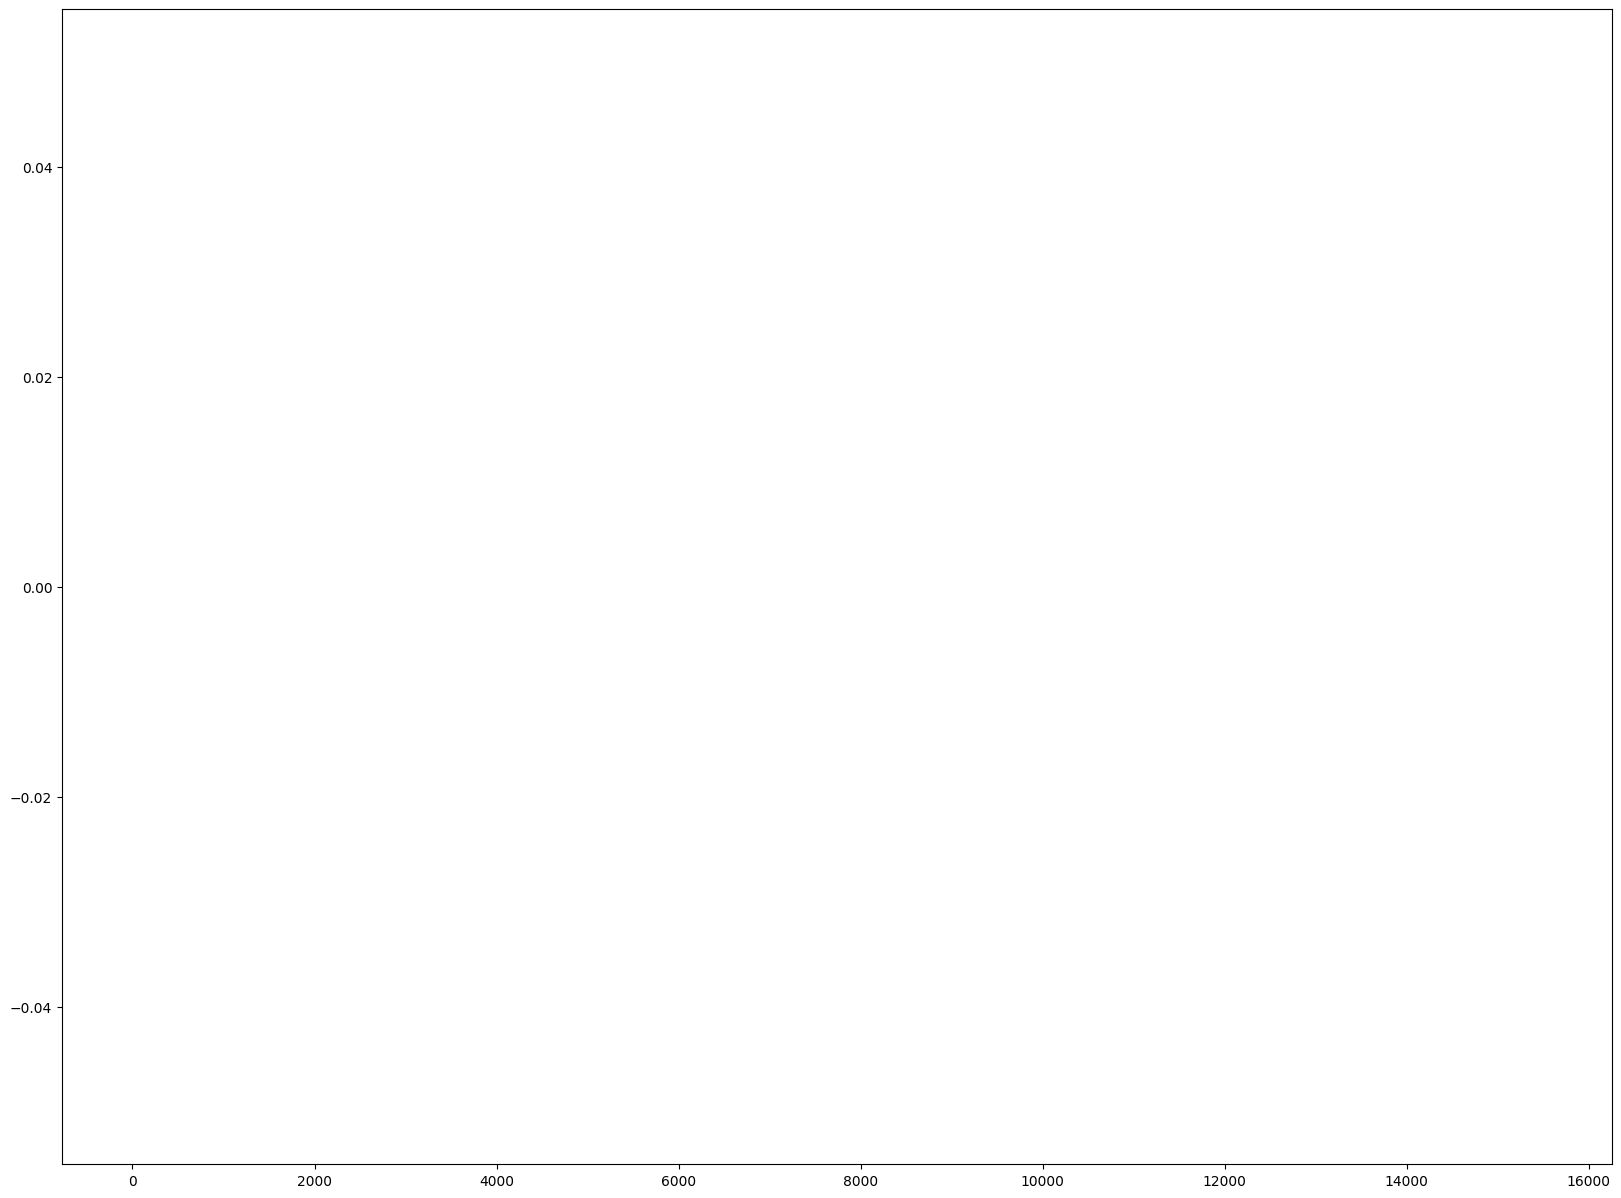

In [42]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_train, color='black', width=0.5)

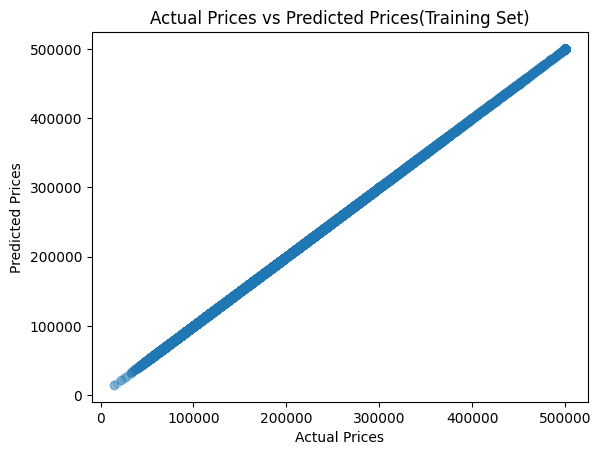

In [43]:
plt.scatter(y_train, y_pred_train, alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Training Set)')
plt.show()

### Test set

In [44]:
performance_test['ERROR'] = performance_test['ACTUAL VALUES'] - performance_test['PREDICTIONS']
performance_test.reset_index(drop=True, inplace=True)
performance_test.reset_index(inplace=True)
performance_test

,index,ACTUAL VALUES,PREDICTIONS,ERROR
0,0,136900,136900.0,0.0
1,1,241300,241300.0,0.0
2,2,200700,200700.0,0.0
3,3,72500,72500.0,0.0
4,4,460000,460000.0,0.0
...,...,...,...,...
5155,5155,121200,121200.0,0.0
5156,5156,137500,137500.0,0.0
5157,5157,160900,160900.0,0.0
5158,5158,227300,227300.0,0.0


<BarContainer object of 5160 artists>

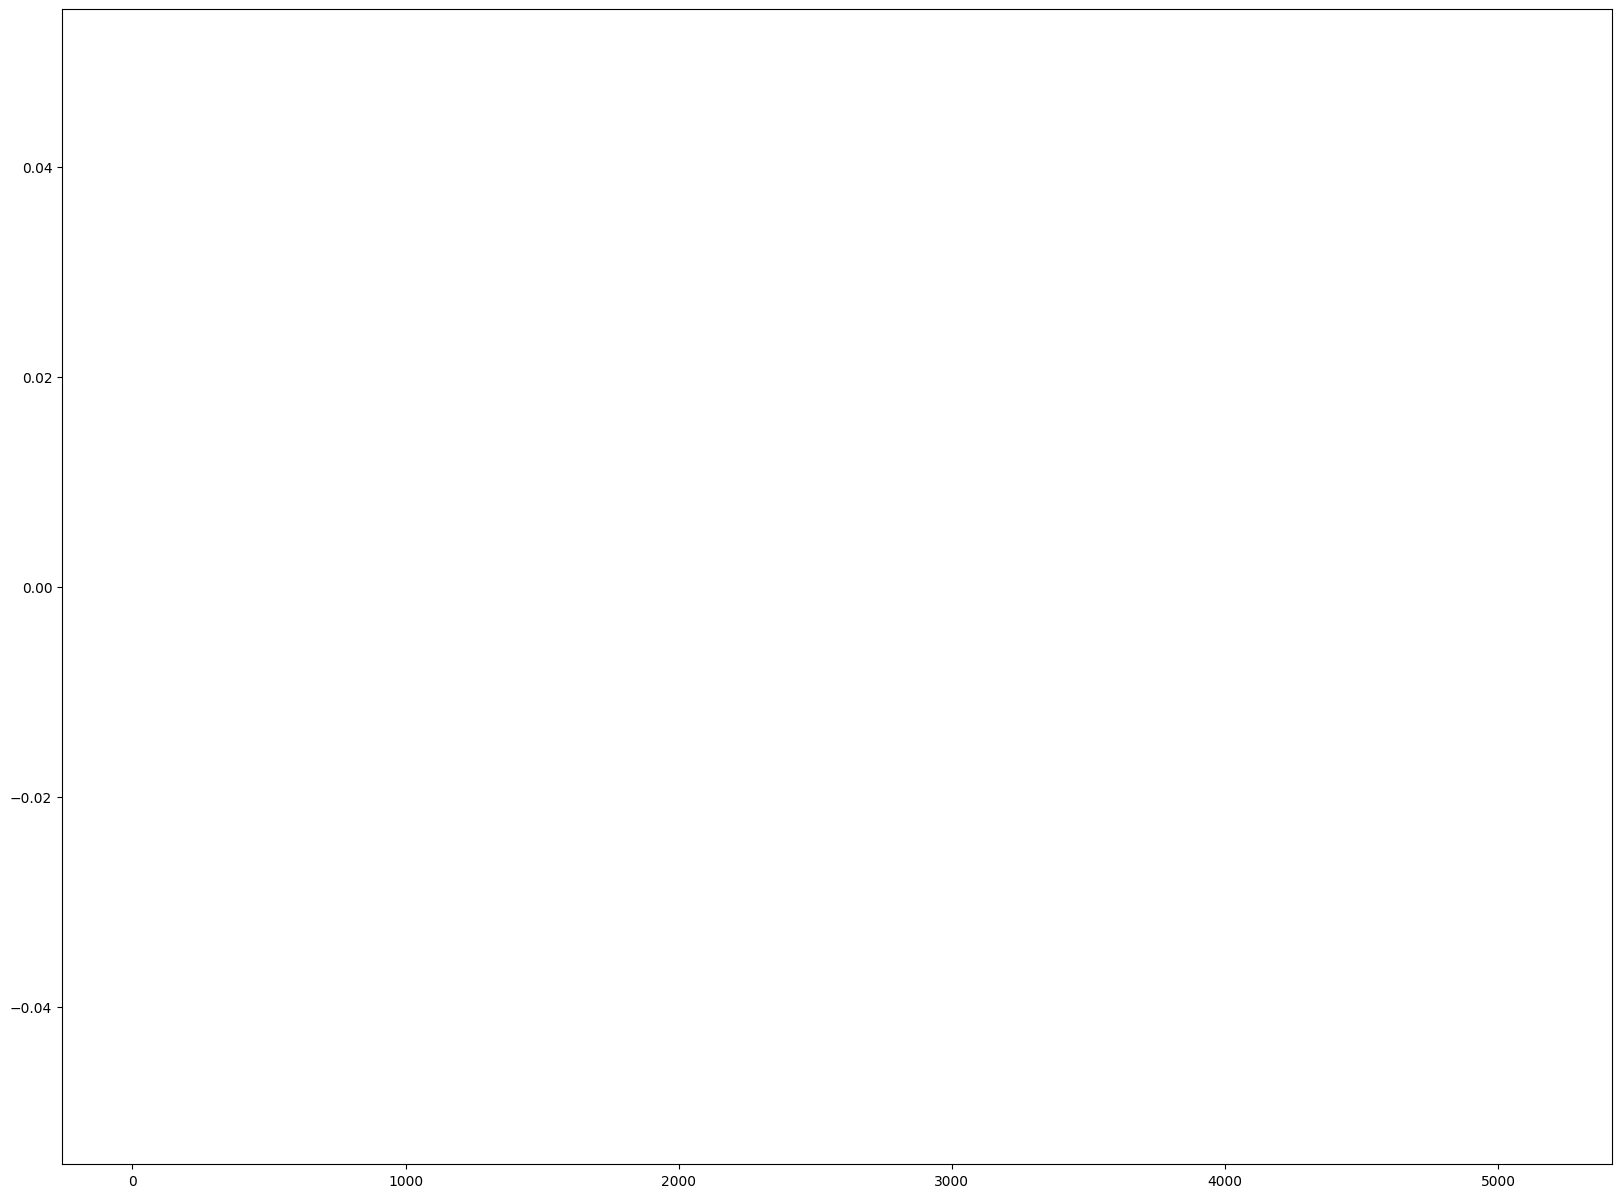

In [45]:
fig = plt.figure(figsize=(20, 15))
plt.bar('index', 'ERROR', data=performance_test, color='black', width=0.5)

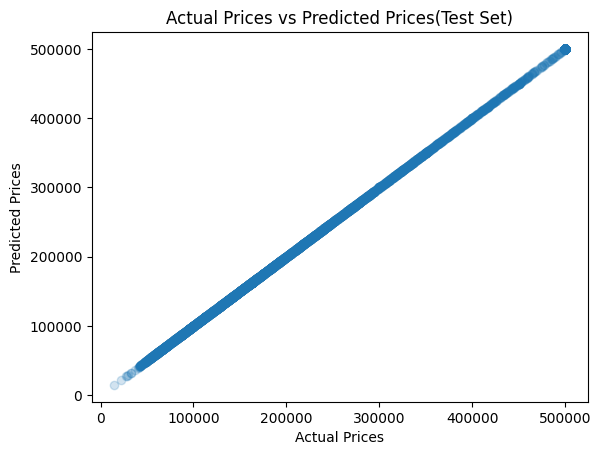

In [46]:
plt.scatter(y_test, y_pred_test, alpha=0.2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices(Test Set)')
plt.show()